In [1]:
import scipy.stats as stats
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
#import smogn #회귀 문제를 위한 SMOTE 오버 샘플링 기법
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from imblearn.over_sampling import SMOTENC

In [2]:
# 데이터 셋 불러오기 (KS값)
data = pd.read_csv('C:/Users/leewa/Desktop/데이터/데이터/1월 주요변수 추출.csv',encoding='euc-kr')

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,Dorosperse Red KKL,Dorosperse Blue KKL,Dorosperse B/K KKL,Dorosperse Dark Grey KKL,Dorosperse Brown K-3LR,Dianix Yellow AM-2R,Dianix Red AM-SLR,Dianix Blue AM-2G,Dianix Black AM-SLR,Dianix Grey AM-SLR,...,Lab 염색 하강속도 #3,Lab 염색 하강온도 #3,Lab 염색 하강온도 #3 유지시간,Lab 염색 종료속도,Lab 염색 종료온도,Lab 염색 종료온도 유지시간,잔욕염색 검사_K/S,잔욕염색 검사_L*,잔욕염색 검사_a*,잔욕염색 검사_b*
0,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.058625,93.21375,-0.67375,4.01250
1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.062750,93.04875,-0.56375,4.22250
2,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.058625,93.37625,-0.49875,3.93000
3,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.057375,93.45375,-0.53125,3.87250
4,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.056750,93.52625,-0.57000,3.78375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,2.509250,63.39625,49.13875,5.32875
1540,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,2.197750,64.74375,47.87000,4.69125
1541,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.484125,77.35625,25.01500,2.79625
1542,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.403625,78.72250,22.50250,2.95500


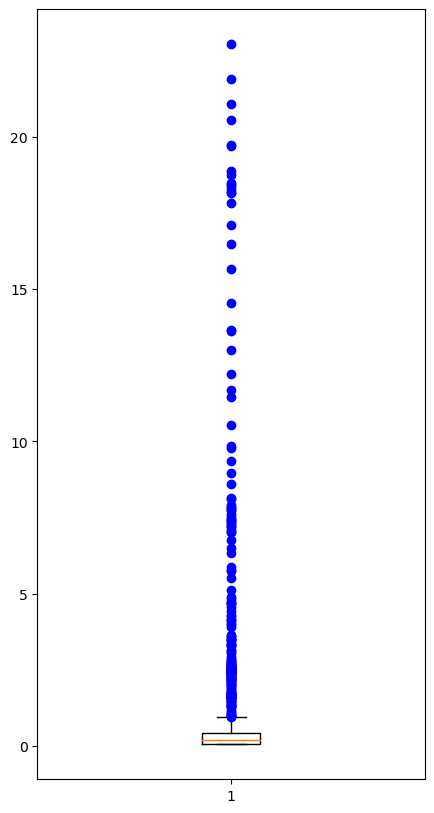

In [4]:
plt.rcParams['figure.figsize'] = (5, 10)
plt.boxplot(data['잔욕염색 검사_K/S'], sym="bo")
plt.show()

In [5]:
Q1 = data['잔욕염색 검사_K/S'].quantile(0.25)
Q2 = data['잔욕염색 검사_K/S'].quantile(0.5)
Q3 = data['잔욕염색 검사_K/S'].quantile(0.75)
IQR = Q3-Q1
IQR

0.35193749999999996

In [6]:
condition = data['잔욕염색 검사_K/S']>Q3+1.5*IQR
data[condition]

,Dorosperse Red KKL,Dorosperse Blue KKL,Dorosperse B/K KKL,Dorosperse Dark Grey KKL,Dorosperse Brown K-3LR,Dianix Yellow AM-2R,Dianix Red AM-SLR,Dianix Blue AM-2G,Dianix Black AM-SLR,Dianix Grey AM-SLR,...,Lab 염색 하강속도 #3,Lab 염색 하강온도 #3,Lab 염색 하강온도 #3 유지시간,Lab 염색 종료속도,Lab 염색 종료온도,Lab 염색 종료온도 유지시간,잔욕염색 검사_K/S,잔욕염색 검사_L*,잔욕염색 검사_a*,잔욕염색 검사_b*
161,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,1.482875,78.47375,10.86250,40.26125
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,3.911500,80.22500,11.84000,66.94500
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,15.650000,72.66500,25.80500,86.36000
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,11.700000,74.73500,21.30000,83.20500
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,7.237500,77.18500,16.44500,76.58500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,4.545000,58.33500,56.45750,8.03250
1534,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,13.625000,48.36375,63.60625,16.10875
1536,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,7.859750,53.49500,61.15250,11.79500
1539,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,2.509250,63.39625,49.13875,5.32875


In [7]:
a = data[condition].index
data.drop(a, inplace=True)
data

,Dorosperse Red KKL,Dorosperse Blue KKL,Dorosperse B/K KKL,Dorosperse Dark Grey KKL,Dorosperse Brown K-3LR,Dianix Yellow AM-2R,Dianix Red AM-SLR,Dianix Blue AM-2G,Dianix Black AM-SLR,Dianix Grey AM-SLR,...,Lab 염색 하강속도 #3,Lab 염색 하강온도 #3,Lab 염색 하강온도 #3 유지시간,Lab 염색 종료속도,Lab 염색 종료온도,Lab 염색 종료온도 유지시간,잔욕염색 검사_K/S,잔욕염색 검사_L*,잔욕염색 검사_a*,잔욕염색 검사_b*
0,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.058625,93.21375,-0.67375,4.01250
1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.062750,93.04875,-0.56375,4.22250
2,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.058625,93.37625,-0.49875,3.93000
3,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.057375,93.45375,-0.53125,3.87250
4,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.056750,93.52625,-0.57000,3.78375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.735625,74.39500,30.71250,2.64750
1538,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.452500,77.80000,23.84875,2.90750
1541,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.484125,77.35625,25.01500,2.79625
1542,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0.403625,78.72250,22.50250,2.95500


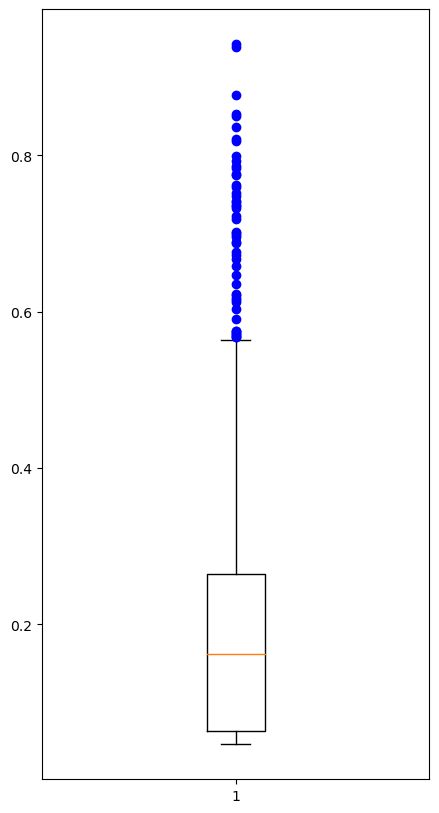

In [8]:
plt.rcParams['figure.figsize'] = (5, 10)
plt.boxplot(data['잔욕염색 검사_K/S'], sym="bo")
plt.show()

In [9]:
x = data[['Dorosperse Red KKL', 'Dorosperse Blue KKL', 'Dorosperse B/K KKL',
       'Dorosperse Dark Grey KKL', 'Dorosperse Brown K-3LR',
       'Dianix Yellow AM-2R', 'Dianix Red AM-SLR', 'Dianix Blue AM-2G',
       'Dianix Black AM-SLR', 'Dianix Grey AM-SLR', 'Dianix Yellow Brown AM-R',
       'Dorosperse Yellow KKL', 'Dorosperse Black KKL','Dorosperse Red KKL_prop', 'Dorosperse Blue KKL_prop', 'Dorosperse B/K KKL_prop',
       'Dorosperse Dark Grey KKL_prop', 'Dorosperse Brown K-3LR_prop',
       'Dianix Yellow AM-2R_prop', 'Dianix Red AM-SLR_prop', 'Dianix Blue AM-2G_prop',
       'Dianix Black AM-SLR_prop', 'Dianix Grey AM-SLR_prop', 'Dianix Yellow Brown AM-R_prop',
       'Dorosperse Yellow KKL_prop', 'Dorosperse Black KKL_prop','배합_Sunsolt RM-340S', '배합_빙초산', 'Lab 염색 시작온도', 'Lab 염색 상승속도 #1',
       'Lab 염색 상승온도 #1', 'Lab 염색 상승온도 #1 유지시간', 'Lab 염색 상승속도 #2',
       'Lab 염색 상승온도 #2', 'Lab 염색 상승온도 #2 유지시간', 'Lab 염색 상승속도 #3',
       'Lab 염색 상승온도 #3', 'Lab 염색 상승온도 #3 유지시간', 'Lab 염색 하강속도 #1',
       'Lab 염색 하강온도 #1', 'Lab 염색 하강온도 #1 유지시간', 'Lab 염색 하강속도 #2',
       'Lab 염색 하강온도 #2', 'Lab 염색 하강온도 #2 유지시간', 'Lab 염색 하강속도 #3',
       'Lab 염색 하강온도 #3', 'Lab 염색 하강온도 #3 유지시간', 'Lab 염색 종료속도', 'Lab 염색 종료온도',
       'Lab 염색 종료온도 유지시간']]
y = data[['잔욕염색 검사_K/S']]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=42)

In [10]:
tree = DecisionTreeRegressor(max_depth=18,min_samples_split = 2, random_state=42)
tree.fit(x_train,y_train)
y_pred = tree.predict(x)
print("training set score: {:.2f}".format(tree.score(x_train, y_train))) # 훈련셋 결정계수
print("test set score: {:.2f}".format(tree.score(x_test, y_test))) # 테스트셋 결정계수
print("r^2 score: {:.2f}".format(r2_score(y, y_pred))) # r2스코어
print("MAE score: {:.2f}".format(mean_absolute_error(y,y_pred))) # MAE스코어
print("MSE score: {:.2f}".format(mean_squared_error(y,y_pred))) # MSE스코어

training set score: 0.91
test set score: 0.76
r^2 score: 0.87
MAE score: 0.02
MSE score: 0.00


In [11]:
RFregressor = RandomForestRegressor(max_depth=20, random_state= 0)
RFregressor.fit(x_train,y_train)
y_pred = RFregressor.predict(x)    
print("training set score: {:.2f}".format(RFregressor.score(x_train, y_train))) # 훈련셋 결정계수
print("test set score: {:.2f}".format(RFregressor.score(x_test, y_test))) # 테스트셋 결정계수
print("r^2 score: {:.2f}".format(r2_score(y, y_pred))) # r2스코어
print("MAE score: {:.2f}".format(mean_absolute_error(y,y_pred))) # MAE스코어
print("MSE score: {:.2f}".format(mean_squared_error(y,y_pred))) # MSE스코어
RFregressor.score(x_test,y_test)

C:\Users\leewa\AppData\Local\Temp\ipykernel_35116\1803126986.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(x_train,y_train)


training set score: 0.93
test set score: 0.82
r^2 score: 0.91
MAE score: 0.02
MSE score: 0.00


0.8201884710334415

In [14]:
estimator = GradientBoostingRegressor(n_estimators = 500,max_depth=22, min_samples_split=16,random_state=0)
estimator.fit(x_train,y_train)
y_pred = estimator.predict(x)    
print("training set score: {:.2f}".format(RFregressor.score(x_train, y_train))) # 훈련셋 결정계수
print("test set score: {:.2f}".format(RFregressor.score(x_test, y_test))) # 테스트셋 결정계수
print("r^2 score: {:.2f}".format(r2_score(y, y_pred))) # r2스코어
print("MAE score: {:.2f}".format(mean_absolute_error(y,y_pred))) # MAE스코어
print("MSE score: {:.2f}".format(mean_squared_error(y,y_pred))) # MSE스코어
estimator.score(x_test,y_test)

C:\Users\leewa\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score: 0.93
test set score: 0.82
r^2 score: 0.95
MAE score: 0.01
MSE score: 0.00


0.7788915826146348

In [17]:
 x_predict = {
'Dorosperse Red KKL': [0], 
'Dorosperse Blue KKL': [0],
'Dorosperse B/K KKL': [0], 
'Dorosperse Dark Grey KKL': [0],
'Dorosperse Brown K-3LR': [0], 
'Dianix Yellow AM-2R': [0],
'Dianix Red AM-SLR': [0], 
'Dianix Blue AM-2G': [0],
'Dianix Black AM-SLR': [0],
'Dianix Grey AM-SLR': [0], 
'Dianix Yellow Brown AM-R': [0],
'Dorosperse Yellow KKL': [0.05], 
'Dorosperse Black KKL': [0],
'Dorosperse Red KKL_prop': [0], 
'Dorosperse Blue KKL_prop': [0],
'Dorosperse B/K KKL_prop': [0], 
'Dorosperse Dark Grey KKL_prop': [0],
'Dorosperse Brown K-3LR_prop': [0], 
'Dianix Yellow AM-2R_prop': [0],
'Dianix Red AM-SLR_prop': [0], 
'Dianix Blue AM-2G_prop': [0],
'Dianix Black AM-SLR_prop': [0],
'Dianix Grey AM-SLR_prop': [0],
'Dianix Yellow Brown AM-R_prop': [0], 
'Dorosperse Yellow KKL_prop': [1],
'Dorosperse Black KKL_prop': [0],
'배합_Sunsolt RM-340S': [0.3],
'배합_빙초산': [0.2], 
'Lab 염색 시작온도': [40], 
'Lab 염색 상승속도 #1': [0.5],
'Lab 염색 상승온도 #1': [64],
'Lab 염색 상승온도 #1 유지시간': [0], 
'Lab 염색 상승속도 #2': [0.5],
'Lab 염색 상승온도 #2': [100],
'Lab 염색 상승온도 #2 유지시간': [0],
'Lab 염색 상승속도 #3': [0.5],
'Lab 염색 상승온도 #3': [135],
'Lab 염색 상승온도 #3 유지시간': [60],
'Lab 염색 하강속도 #1': [1.9722],
'Lab 염색 하강온도 #1': [64],
'Lab 염색 하강온도 #1 유지시간': [0],
'Lab 염색 하강속도 #2': [0],
'Lab 염색 하강온도 #2': [64],
'Lab 염색 하강온도 #2 유지시간': [0],
'Lab 염색 하강속도 #3': [0],
'Lab 염색 하강온도 #3': [64],
'Lab 염색 하강온도 #3 유지시간': [0],
'Lab 염색 종료속도': [0],
'Lab 염색 종료온도': [64],
       'Lab 염색 종료온도 유지시간': [0]
}
x_predict = pd.DataFrame(x_predict)

In [18]:
pred_tree = estimator.predict(x_predict)

print("GB K/S : ", np.round(pred_tree, 5))


GB K/S :  [0.04652]


In [23]:
data_pret=data[['Dorosperse Red KKL', 'Dorosperse Blue KKL', 'Dorosperse B/K KKL',
       'Dorosperse Dark Grey KKL', 'Dorosperse Brown K-3LR',
       'Dianix Yellow AM-2R', 'Dianix Red AM-SLR', 'Dianix Blue AM-2G',
       'Dianix Black AM-SLR', 'Dianix Grey AM-SLR', 'Dianix Yellow Brown AM-R',
       'Dorosperse Yellow KKL', 'Dorosperse Black KKL','Dorosperse Red KKL_prop', 'Dorosperse Blue KKL_prop', 'Dorosperse B/K KKL_prop',
       'Dorosperse Dark Grey KKL_prop', 'Dorosperse Brown K-3LR_prop',
       'Dianix Yellow AM-2R_prop', 'Dianix Red AM-SLR_prop', 'Dianix Blue AM-2G_prop',
       'Dianix Black AM-SLR_prop', 'Dianix Grey AM-SLR_prop', 'Dianix Yellow Brown AM-R_prop',
       'Dorosperse Yellow KKL_prop', 'Dorosperse Black KKL_prop','배합_Sunsolt RM-340S', '배합_빙초산', 'Lab 염색 시작온도', 'Lab 염색 상승속도 #1',
       'Lab 염색 상승온도 #1', 'Lab 염색 상승온도 #1 유지시간', 'Lab 염색 상승속도 #2',
       'Lab 염색 상승온도 #2', 'Lab 염색 상승온도 #2 유지시간', 'Lab 염색 상승속도 #3',
       'Lab 염색 상승온도 #3', 'Lab 염색 상승온도 #3 유지시간', 'Lab 염색 하강속도 #1',
       'Lab 염색 하강온도 #1', 'Lab 염색 하강온도 #1 유지시간', 'Lab 염색 하강속도 #2',
       'Lab 염색 하강온도 #2', 'Lab 염색 하강온도 #2 유지시간', 'Lab 염색 하강속도 #3',
       'Lab 염색 하강온도 #3', 'Lab 염색 하강온도 #3 유지시간', 'Lab 염색 종료속도', 'Lab 염색 종료온도',
       'Lab 염색 종료온도 유지시간','잔욕염색 검사_K/S']]
X=data_pret[[   'Dorosperse Red KKL', 'Dorosperse Blue KKL', 'Dorosperse B/K KKL',
       'Dorosperse Dark Grey KKL', 'Dorosperse Brown K-3LR',
       'Dianix Yellow AM-2R', 'Dianix Red AM-SLR', 'Dianix Blue AM-2G',
       'Dianix Black AM-SLR', 'Dianix Grey AM-SLR', 'Dianix Yellow Brown AM-R',
       'Dorosperse Yellow KKL', 'Dorosperse Black KKL','Dorosperse Red KKL_prop', 'Dorosperse Blue KKL_prop', 'Dorosperse B/K KKL_prop',
       'Dorosperse Dark Grey KKL_prop', 'Dorosperse Brown K-3LR_prop',
       'Dianix Yellow AM-2R_prop', 'Dianix Red AM-SLR_prop', 'Dianix Blue AM-2G_prop',
       'Dianix Black AM-SLR_prop', 'Dianix Grey AM-SLR_prop', 'Dianix Yellow Brown AM-R_prop',
       'Dorosperse Yellow KKL_prop', 'Dorosperse Black KKL_prop','배합_Sunsolt RM-340S', '배합_빙초산', 'Lab 염색 시작온도', 'Lab 염색 상승속도 #1',
       'Lab 염색 상승온도 #1', 'Lab 염색 상승온도 #1 유지시간', 'Lab 염색 상승속도 #2',
       'Lab 염색 상승온도 #2', 'Lab 염색 상승온도 #2 유지시간', 'Lab 염색 상승속도 #3',
       'Lab 염색 상승온도 #3', 'Lab 염색 상승온도 #3 유지시간', 'Lab 염색 하강속도 #1',
       'Lab 염색 하강온도 #1', 'Lab 염색 하강온도 #1 유지시간', 'Lab 염색 하강속도 #2',
       'Lab 염색 하강온도 #2', 'Lab 염색 하강온도 #2 유지시간', 'Lab 염색 하강속도 #3',
       'Lab 염색 하강온도 #3', 'Lab 염색 하강온도 #3 유지시간', 'Lab 염색 종료속도', 'Lab 염색 종료온도',
       'Lab 염색 종료온도 유지시간'
            ]]
Y=data_pret[['잔욕염색 검사_K/S']]

In [25]:
data_origin=pd.concat([X,Y],axis=1)
data_origin.columns=data_pret.columns
data_origin.to_csv('C:/Users/leewa/Desktop/데이터/학습데이터.csv',encoding='euc-kr')

In [26]:
data_origin

,Dorosperse Red KKL,Dorosperse Blue KKL,Dorosperse B/K KKL,Dorosperse Dark Grey KKL,Dorosperse Brown K-3LR,Dianix Yellow AM-2R,Dianix Red AM-SLR,Dianix Blue AM-2G,Dianix Black AM-SLR,Dianix Grey AM-SLR,...,Lab 염색 하강속도 #2,Lab 염색 하강온도 #2,Lab 염색 하강온도 #2 유지시간,Lab 염색 하강속도 #3,Lab 염색 하강온도 #3,Lab 염색 하강온도 #3 유지시간,Lab 염색 종료속도,Lab 염색 종료온도,Lab 염색 종료온도 유지시간,잔욕염색 검사_K/S
0,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.058625
1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.062750
2,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.058625
3,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.057375
4,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.056750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.735625
1538,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.452500
1541,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.484125
1542,4.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,64,0,0,64,0,0,64,0,0.403625


In [28]:
X_np=np.array(X)
Y_np=np.array(Y)
print(X_np.shape)
print(Y_np.shape)

(1324, 50)
(1324, 1)


In [32]:
x_train = X_np
x_test = X_np
y_train = Y_np
y_test =  Y_np

In [34]:
X_train[[0,1,5]].shape

(3, 50)

In [39]:
import pickle


In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

In [43]:
#사용데이터 저장
#카테고리 데이터 내보내기
with open("C:/Users/leewa/Desktop/데이터/x_train_KS.pkl","wb") as f:
    pickle.dump(x_train,f)
with open("C:/Users/leewa/Desktop/데이터/y_train_KS.pkl","wb") as f:
    pickle.dump(y_train,f)
    

In [42]:
#사용모델 저장
with open("C:/Users/leewa/Desktop/데이터/model_KS.pkl","wb") as e:
    pickle.dump(estimator,e)

In [19]:
y_train.shape

(1059, 1)

In [19]:
# lightgbm을 구현하여 shap value를 예측할 것
# ligthgbm 구현

# library
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = x_train, label = y_train) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, y_test)))) # RMSE

C:\Users\leewa\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 1059, number of used features: 31
[LightGBM] [Info] Start training from score 0.203116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

NameError: name 'test_x' is not defined

In [20]:
# shap value를 이용하여 각 변수의 영향도 파악

# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(x_test) # Shap Values 계산

In [21]:
# version 확인
import skimage
skimage.__version__

'0.19.2'

Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
Glyph 49549 (\N{HANG

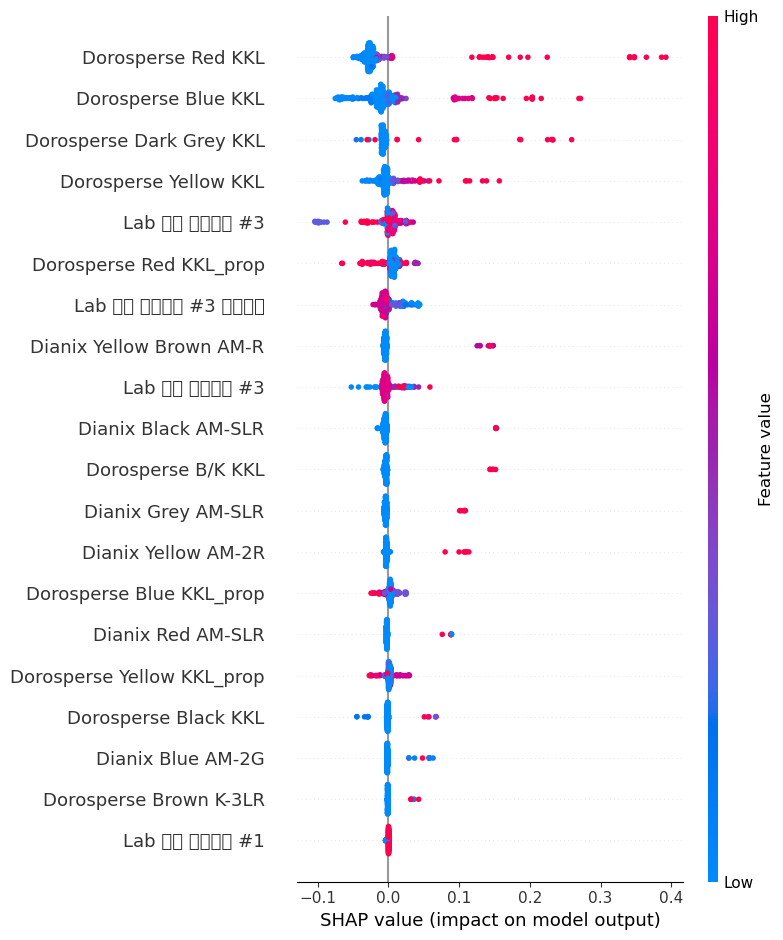

In [22]:
# summary
shap.summary_plot(shap_values, x_test)

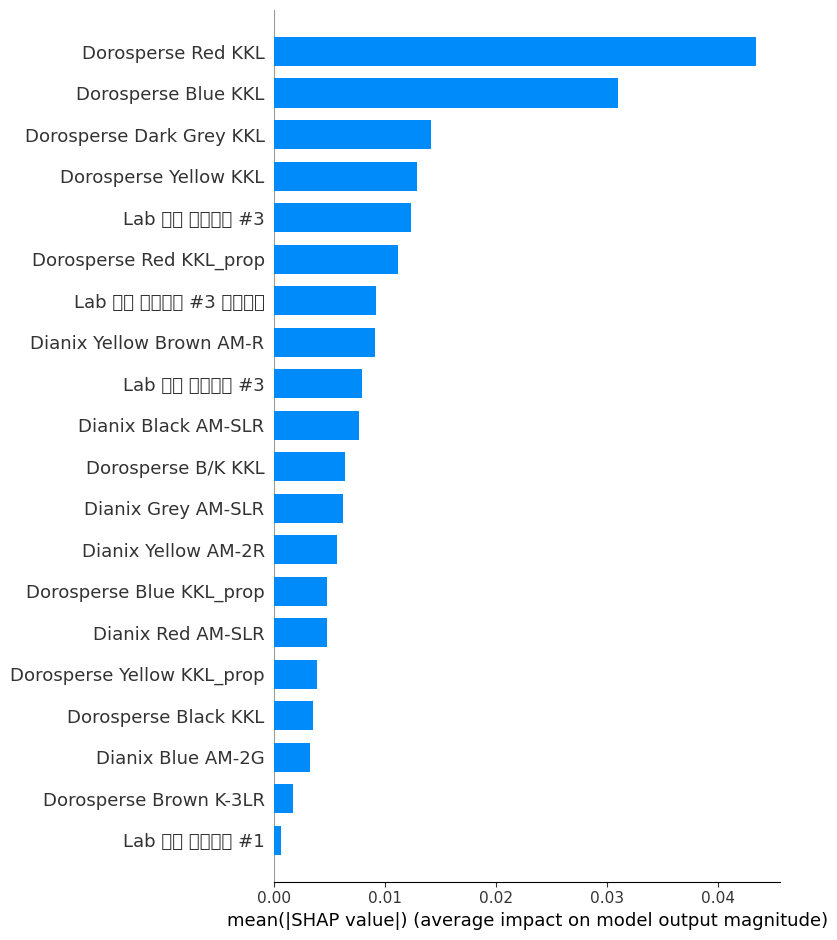

In [23]:
shap.summary_plot(shap_values, x_test, plot_type = "bar")

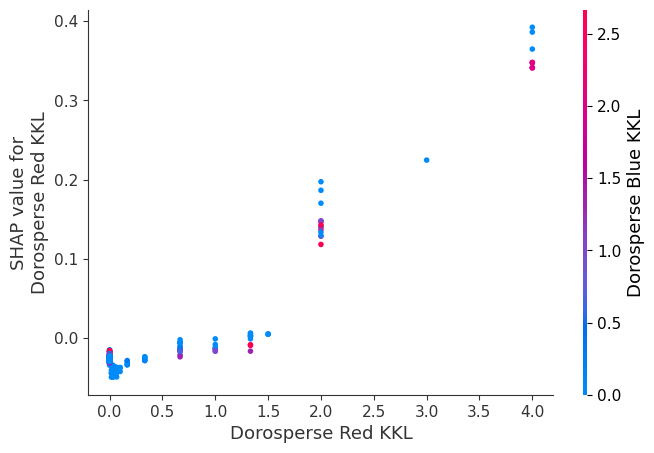

In [24]:
shap.dependence_plot("Dorosperse Red KKL", shap_values, x_test)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='잔욕염색 검사_K/S'>

Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
Glyph 50837 (\N{HANGUL SYLLABLE YOG}) missing from current font.
Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.


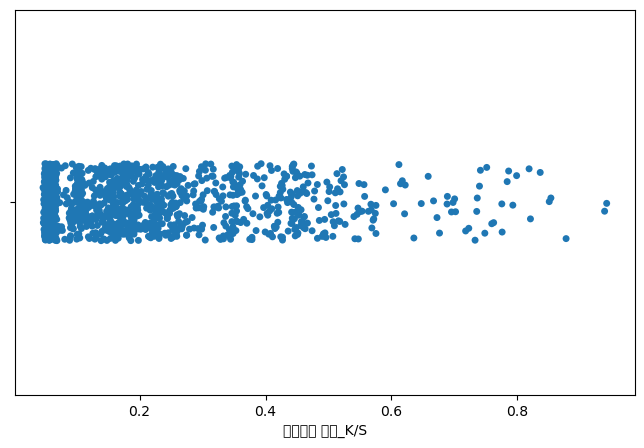

In [29]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.stripplot(data['잔욕염색 검사_K/S'])